In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Dataset

In [47]:
df = pd.read_csv('test_data.txt', header = None)

In [25]:
import seaborn as sns
import re
import string
import nltk
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , accuracy_score, recall_score, f1_score

In [26]:
df = pd.read_csv('test_data.txt', header = None)

In [27]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,1 ::: Edgar's Lunch (1998) ::: L.R. Brane love...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2 ::: La guerra de papá (1977) ::: Spain, Marc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 ::: Off the Beaten Track (2010) ::: One year...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4 ::: Meu Amigo Hindu (2015) ::: His father ha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5 ::: Er nu zhai (1955) ::: Before he was know...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train_data = pd.read_csv('train_data.txt', sep=":::", names=["Title", "Genre", "Description"], engine="python")

In [29]:
train_data.head(5)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [30]:
train_data.shape

(54214, 3)

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [32]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [33]:
train_data.duplicated().sum()

0

In [34]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [35]:
test_data = pd.read_csv('test_data.txt', sep=":::", names=["Id" ,"Title", "Description"], engine="python")

In [36]:
test_data.head()

,Id,Title,Description
0,"""1",Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),Before he was known internationally as a mart...


In [37]:
test_data.shape

(54200, 3)

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  object
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


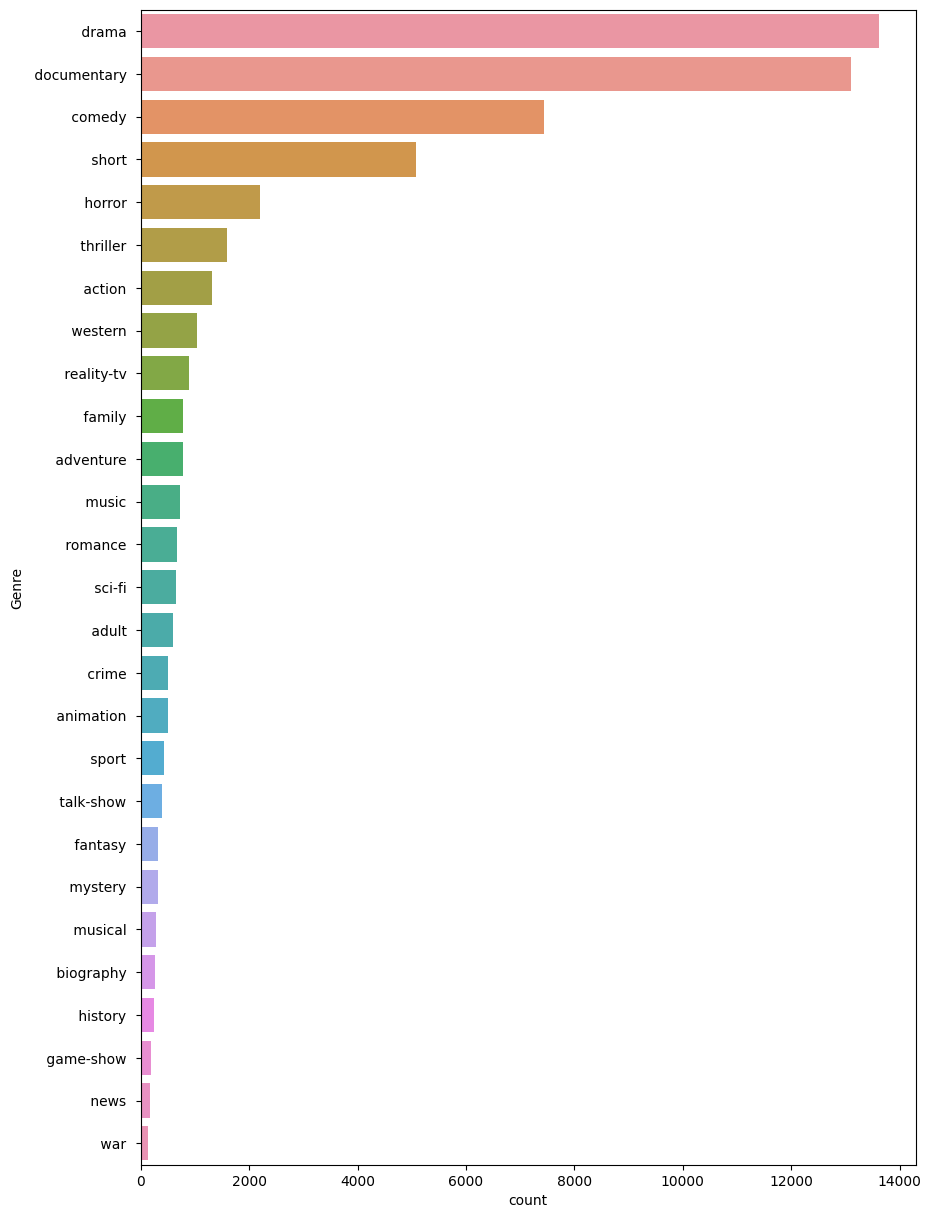

In [39]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index)
plt.show()

In [40]:
for i in range(5):
    print("Genre: ", [i])
    print(train_data['Description'].iloc[i], "\n")
    print("Title: ", train_data['Title'].iloc[i], "\n\n")

Genre:  [0]
 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue. 

Title:   Oscar et la dame rose (2009)  


Genre:  [1]
 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him. 

Title:   Cupid (1997)  


Genre:  [2]
 As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more 

In [41]:
train_data['Genre']

1               drama 
2            thriller 
3               adult 
4               drama 
5               drama 
             ...      
54210          comedy 
54211          horror 
54212     documentary 
54213          comedy 
54214         history 
Name: Genre, Length: 54214, dtype: object

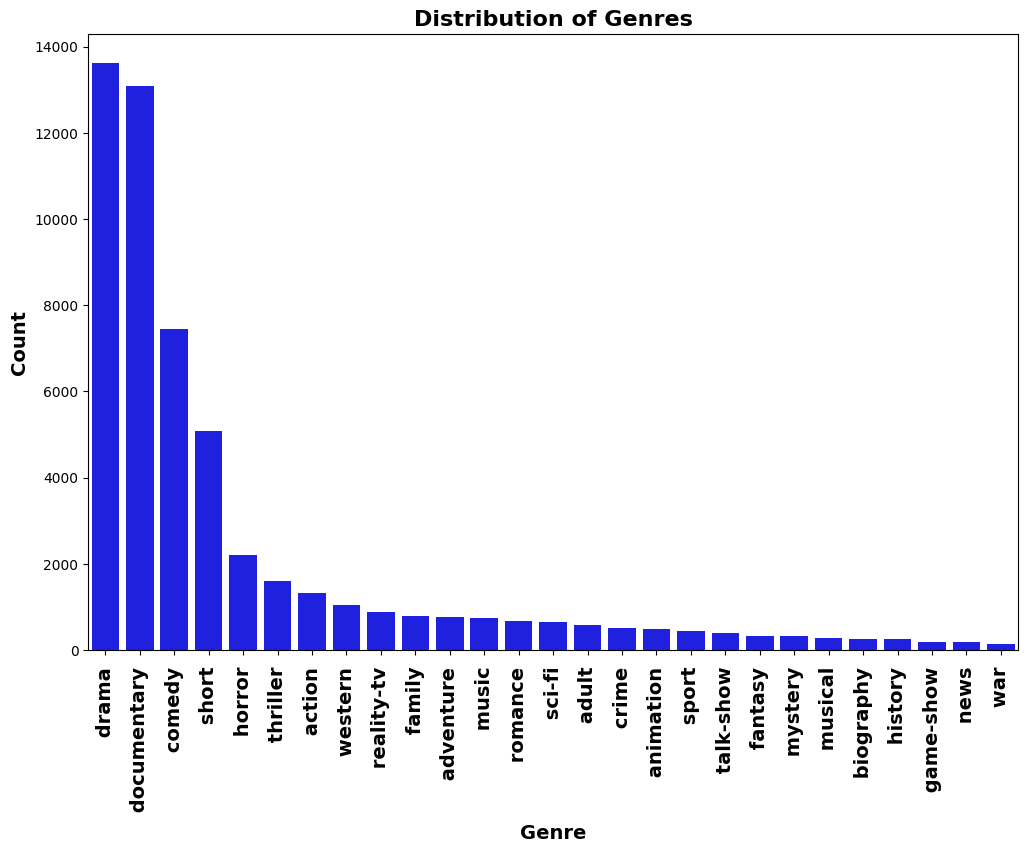

In [42]:
plt.figure(figsize=(12,8))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold');

In [43]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


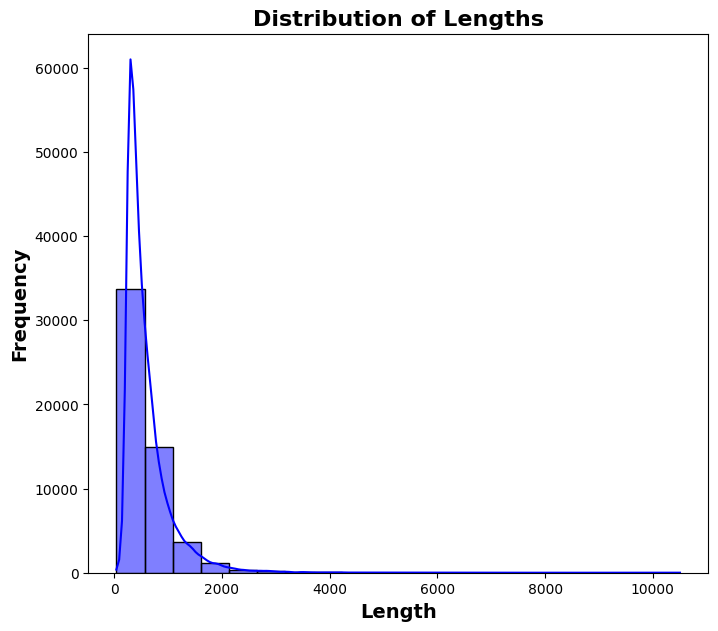

In [44]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

In [46]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)  # Change to replace non-characters with a space
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    # Use the predefined stop_words variable instead of redefining it inside the function
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()  # Replace multiple spaces with a single space
    return text

train_data["TextCleaning"] = train_data["Description"].apply(data_processing)
test_data["TextCleaning"] = test_data["Description"].apply(data_processing)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\sabbo/nltk_data'
    - 'C:\\Users\\sabbo\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\sabbo\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\sabbo\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\sabbo\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
